In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [6]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data = df['#Passengers']

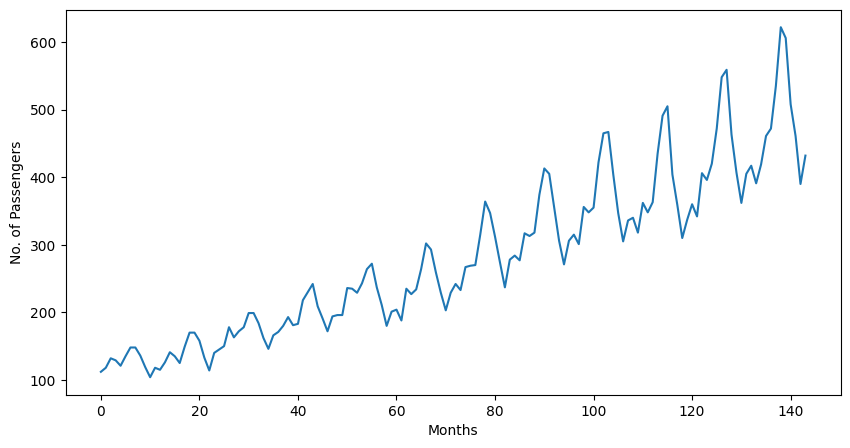

In [15]:
plt.plot(data)
plt.ylabel('No. of Passengers')
plt.xlabel('Months')
plt.show()

## Method 1 - Differencing and Seasonal Differencing.

### Differencing meaning, y(t) = y(t) - y(t-1), i.e,  y at time (t) = y at time (t) - y at time (t-1)

In [33]:
df['diff'] = df['#Passengers'] - df['#Passengers'].shift(1)

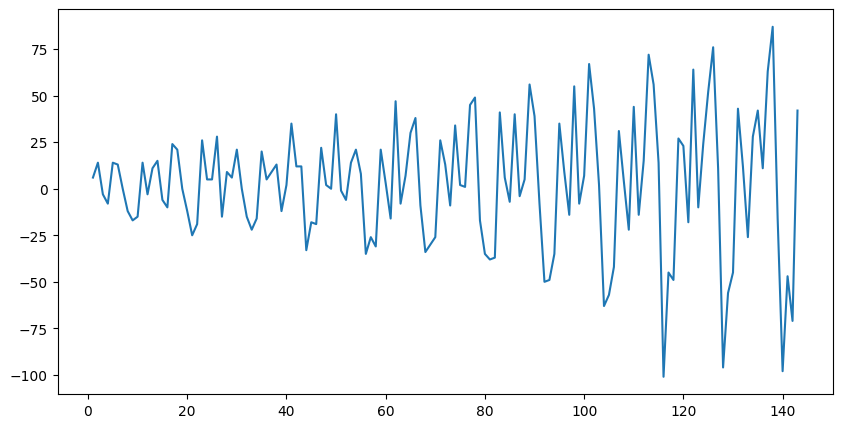

In [34]:
plt.plot(df['diff'].dropna())
plt.show()

### Seasonal differencing

y(t) = y(t) - y(t-n)     where n = L (seasonal lenght- interval b/w two seasonality in a time series)

since its flight data , assume on sundays there may be more passengers. so L for weekly seasonality is 7.

choose it based on the data.

In [35]:
df['diff_seasonal'] = df['#Passengers'] - df['#Passengers'].shift(7)

<Axes: >

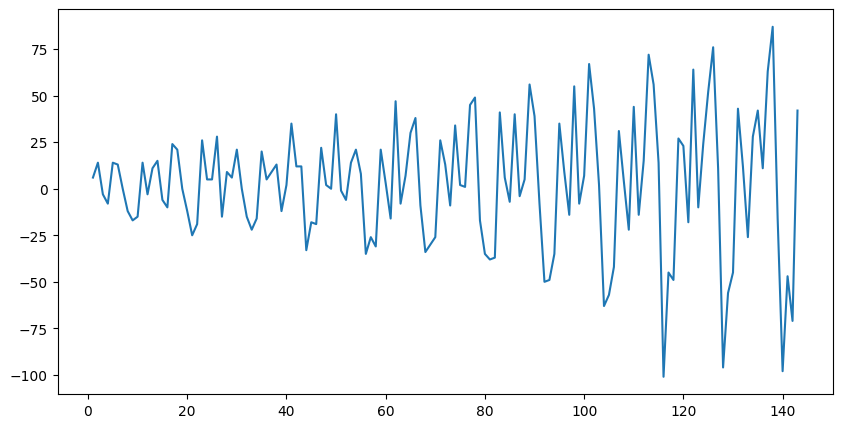

In [37]:
df['diff'].dropna().plot()

### Note:

Whenever we do differencing , each time we sholud do adfuller test for stationarity.

In adfuller test the null hypothesis is 'Data is non-stationary'

if p-value is less than 0.05 or 5%, then the time series data is stationary. 

## Method 2 - Transformation.

### Note : Must do differencing after transformation. Transformation + differencing

In [39]:
import numpy as np

In [40]:
#transform to log
df['adjusted_to_log'] = np.log(df['#Passengers'])

#transform to sqrt
df['adjusred_to_sqrt'] = np.sqrt(df['#Passengers'])

#transform to cbrt
df['adjusted_to_cbrt'] = np.cbrt(df['#Passengers'])

In [42]:
#Do differencing 
data_log = df['adjusted_to_log'] - df['adjusted_to_log'].shift(1)
data_sqrt = df['adjusred_to_sqrt'] - df['adjusred_to_sqrt'].shift(1)
data_cbrt = df['adjusted_to_cbrt'] - df['adjusted_to_cbrt'].shift(1)

<Axes: >

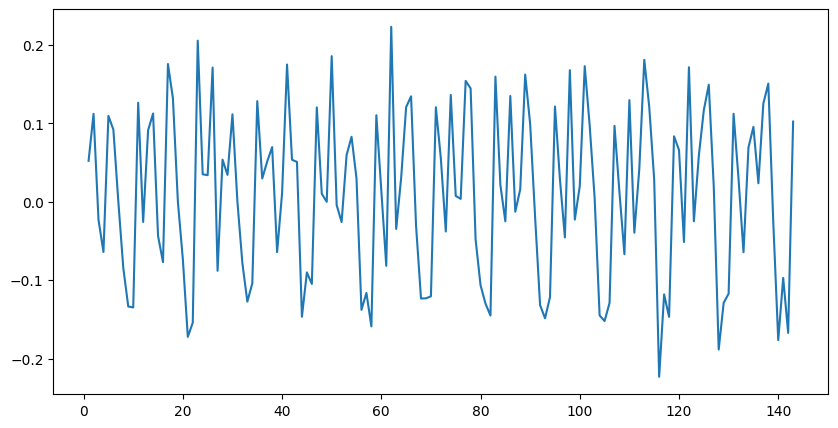

In [49]:
data_log.dropna().plot()

<Axes: >

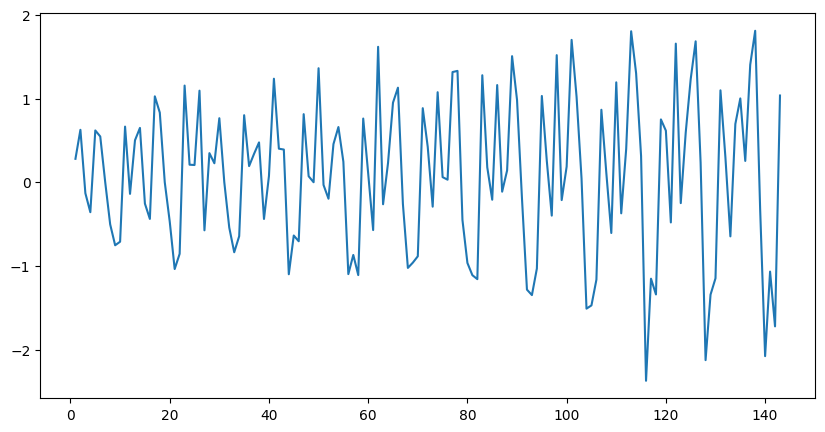

In [48]:
data_sqrt.dropna().plot()

<Axes: >

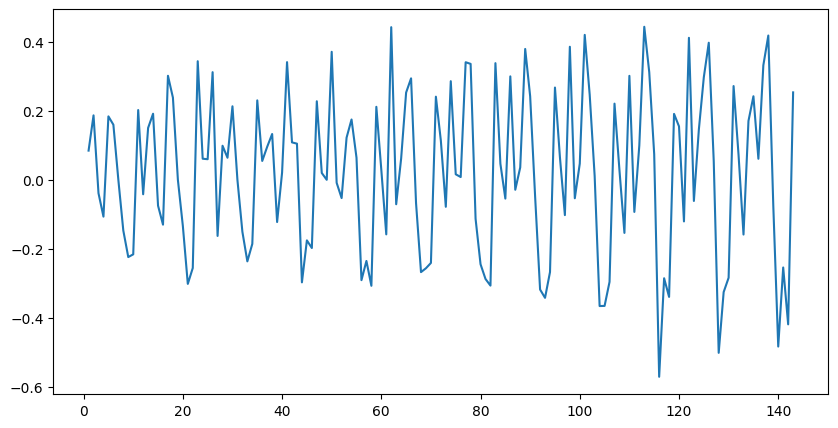

In [47]:
data_cbrt.dropna().plot()

### Note:

Whenever we do differencing(Transformation + differencing) , each time we sholud do adfuller test for stationarity.

In adfuller test the null hypothesis is 'Data is non-stationary'

if p-value is less than 0.05 or 5%, then the time series data is stationary. 

## Method 3 - Rolling Stats

In [50]:
#Moving average with window= 10.
df['MA10'] = df['#Passengers'].rolling(window=10).mean()

#Moving average with window= 20.
df['MA20'] = df['#Passengers'].rolling(window=20).mean()

#Moving average with window= 30.
df['MA30'] = df['#Passengers'].rolling(window=30).mean()

<Axes: >

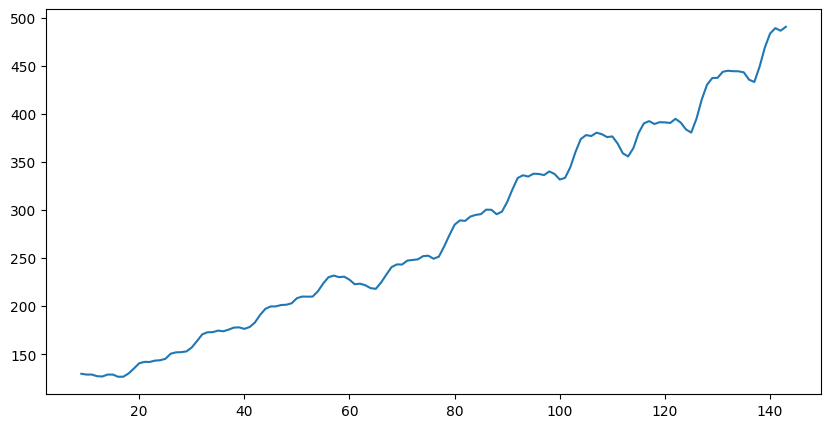

In [51]:
df['MA10'].dropna().plot()

<Axes: >

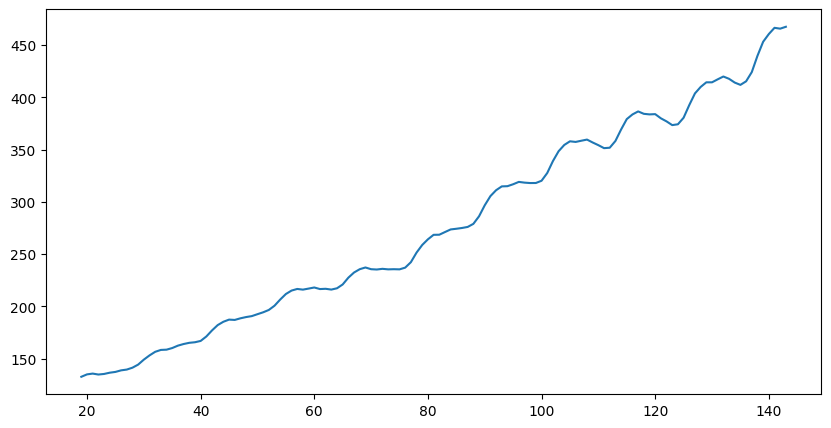

In [52]:
df['MA20'].dropna().plot()

<Axes: >

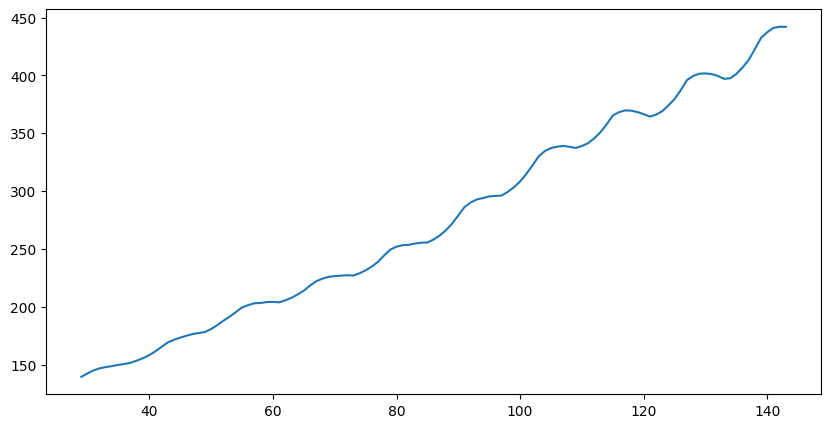

In [53]:
df['MA30'].dropna().plot()

As we increase the window the curve is getting smoother

 #### we can use different combinatio of these 3 methods to attain stationarity.(always differencing at the end)

### Note:

Whenever we do differencing(Transformation + differencing) , each time we sholud do adfuller test for stationarity.

In adfuller test the null hypothesis is 'Data is non-stationary'

if p-value is less than 0.05 or 5%, then the time series data is stationary. 